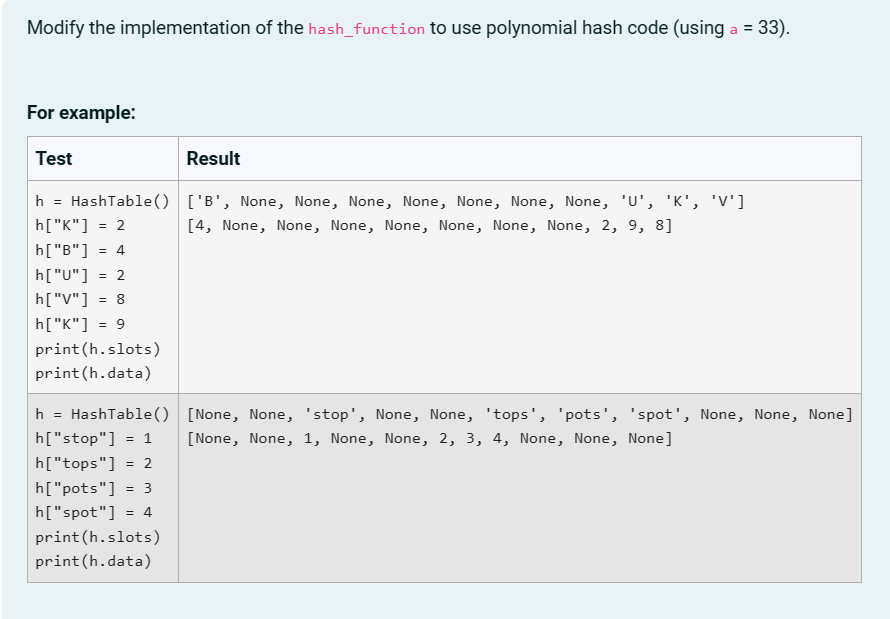

In [25]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self, key, data):
        hash_value = self.hash_function(key, len(self.slots))

        if self.slots[hash_value] is None:
            self.slots[hash_value] = key
            self.data[hash_value] = data
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = data  # replace
            else:
                next_slot = self.rehash(hash_value, len(self.slots))
                while (
                    self.slots[next_slot] is not None
                    and self.slots[next_slot] != key
                ):
                    next_slot = self.rehash(next_slot, len(self.slots))

                if self.slots[next_slot] is None:
                    self.slots[next_slot] = key
                    self.data[next_slot] = data
                else:
                    self.data[next_slot] = data

    def hash_function(self, key, size):
        return self.poly_hash_code(key) % size       # convert key to polynomial hash code, use seperate chaining

    def rehash(self, old_hash, size):
        return (old_hash + 1) % size

    def get(self, key):
        start_slot = self.hash_function(key, len(self.slots))

        position = start_slot
        while self.slots[position] is not None:
            if self.slots[position] == key:
                return self.data[position]
            else:
                position = self.rehash(position, len(self.slots))
                if position == start_slot:
                    return None

    def __getitem__(self, key):
        return self.get(key)

    def __setitem__(self, key, data):
        self.put(key, data)
        
    def poly_hash_code(self, x, a=33):
        result = 0
        for i in range(len(x)):                     # loops all characters
            result += ord(x[i]) * a**(len(x)-1-i)   # polynomial function
        return result

# Case Example #

In [26]:
h = HashTable()
h["K"] = 2
h["B"] = 4
h["U"] = 2
h["V"] = 8
h["K"] = 9
print(h.slots)
print(h.data)

['B', None, None, None, None, None, None, None, 'U', 'K', 'V']
[4, None, None, None, None, None, None, None, 2, 9, 8]


In [27]:
h = HashTable()
h["stop"] = 1
h["tops"] = 2
h["pots"] = 3
h["spot"] = 4
print(h.slots)
print(h.data)

[None, None, 'stop', None, None, 'tops', 'pots', 'spot', None, None, None]
[None, None, 1, None, None, 2, 3, 4, None, None, None]


In [28]:
h = HashTable()
h["cat"] = 54
h["dog"] = 26
h["lion"] = 93
h["tiger"] = 17
h["bird"] = 77
h["cow"] = 31
h["goat"] = 44
h["pig"] = 55
h["chicken"] = 20
print(h.slots)
print(h.data)

['lion', 'bird', 'chicken', None, 'dog', 'tiger', 'cat', 'goat', 'pig', 'cow', None]
[93, 77, 20, None, 26, 17, 54, 44, 55, 31, None]
